In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from qbstyles import mpl_style; mpl_style(dark=True)
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [2]:
nb_version = "v5"

In [3]:
df = pd.read_csv('../../data/raw/detection_data.csv')
df = df.drop(['Unnamed: 7','Unnamed: 8'], axis=1)
df = df.rename(columns={'Output (S)':'output'})
df

,output,Ia,Ib,Ic,Va,Vb,Vc
0,0,-170.472196,9.219613,161.252583,0.054490,-0.659921,0.605431
1,0,-122.235754,6.168667,116.067087,0.102000,-0.628612,0.526202
2,0,-90.161474,3.813632,86.347841,0.141026,-0.605277,0.464251
3,0,-79.904916,2.398803,77.506112,0.156272,-0.602235,0.445963
4,0,-63.885255,0.590667,63.294587,0.180451,-0.591501,0.411050
...,...,...,...,...,...,...,...
11996,0,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598
11997,0,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407
11998,0,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104
11999,0,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690


In [4]:
X = df.drop('output', axis=1)
X_ss = StandardScaler().fit_transform(X)
Y = df[['output']]

In [5]:
model_ann = Sequential()
model_ann.add(Dense(units=6, activation='relu', input_shape=(6,)))
model_ann.add(Dense(units=6, activation='relu'))
model_ann.add(Dense(units=1, activation='sigmoid'))
model_ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 42        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


In [6]:
hist = model_ann.fit(X_ss, Y, batch_size=32, epochs=1000)

Epoch 1/1000
376/376 [==============================] - 6s 2ms/step - loss: 0.5322 - accuracy: 0.8291
Epoch 2/1000
376/376 [==============================] - 1s 2ms/step - loss: 0.1738 - accuracy: 0.9568
Epoch 3/1000
376/376 [==============================] - 1s 1ms/step - loss: 0.0850 - accuracy: 0.9739
Epoch 4/1000
376/376 [==============================] - 0s 1ms/step - loss: 0.0632 - accuracy: 0.9797
Epoch 5/1000
376/376 [==============================] - 0s 1ms/step - loss: 0.0527 - accuracy: 0.9828
Epoch 6/1000
376/376 [==============================] - 0s 1ms/step - loss: 0.0466 - accuracy: 0.9852
Epoch 7/1000
376/376 [==============================] - 0s 1ms/step - loss: 0.0423 - accuracy: 0.9865
Epoch 8/1000
376/376 [==============================] - 0s 1ms/step - loss: 0.0391 - accuracy: 0.9874
Epoch 9/1000
376/376 [==============================] - 0s 1ms/step - loss: 0.0376 - accuracy: 0.9882
Epoch 10/1000
376/376 [==============================] - 0s 1ms/step - loss: 0.035

In [7]:
loss, acc = model_ann.evaluate(X_ss, Y, verbose=0)
print('Final loss:', loss)
print('Final accuracy:', acc)

Final loss: 0.004776425193995237
Final accuracy: 0.9973335266113281


In [11]:
training = pd.DataFrame(hist.history)
training

,loss,accuracy
0,0.532227,0.829098
1,0.173765,0.956837
2,0.084956,0.973919
3,0.063202,0.979668
4,0.052742,0.982835
...,...,...
995,0.005732,0.996834
996,0.005907,0.997084
997,0.006501,0.997084
998,0.005704,0.996834


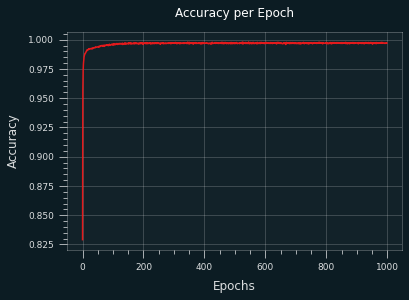

In [13]:
plt.plot(training['accuracy'])
plt.title('Accuracy per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

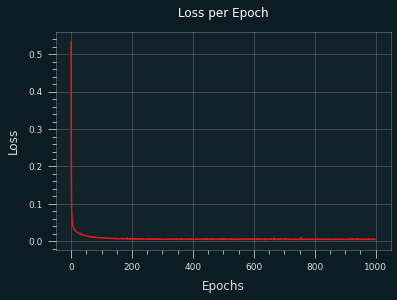

In [14]:
plt.plot(training['loss'])
plt.title('Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [15]:
Y_hat = model_ann.predict(X_ss)
Y_hat = np.where(Y_hat < 0.5, 0, 1)
Y_hat = np.reshape(Y_hat, len(Y_hat))
print('Report:\n', classification_report(Y, Y_hat, digits=5))

376/376 [==============================] - 1s 2ms/step
Report:
               precision    recall  f1-score   support

           0    0.99800   0.99708   0.99754      6505
           1    0.99655   0.99763   0.99709      5496

    accuracy                        0.99733     12001
   macro avg    0.99727   0.99736   0.99731     12001
weighted avg    0.99733   0.99733   0.99733     12001



Text(0.5, 1.0, 'Confusion Matrix from Total Set')

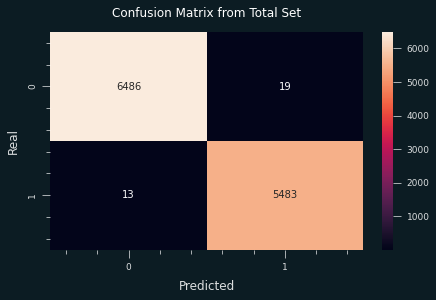

In [16]:
cmf = confusion_matrix(Y, Y_hat)
plt.figure(figsize=(7,4))
sns.heatmap(cmf, annot=True, fmt='d', linecolor='gray')
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.title('Confusion Matrix from Total Set')

Text(0.5, 1.0, 'Confusion Matrix from Total Set')

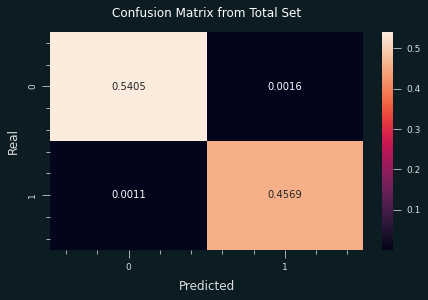

In [18]:
cmf_norm = confusion_matrix(Y, Y_hat, normalize='all')
plt.figure(figsize=(7,4))
sns.heatmap(cmf_norm, annot=True, fmt='.4f', linecolor='gray')
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.title('Confusion Matrix from Total Set')

In [19]:
# model_ann.save(f'model_ann_{nb_version}.h5')